## Iris Flower Classification

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# importing the dataset
data = pd.read_csv(r"D:\IITR\ML Project\Oasis Infobyte\Iris Flower Prediction\Iris.csv")

In [3]:
# having a breif overview of the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
# datatypes of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# dropping extra information in our data
data.drop('Id', axis=1, inplace=True)

In [8]:
# data statistics
data.describe(exclude = 'object')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Checking for duplicate data
print(data.duplicated().sum())

3


In [10]:
data.shape

(150, 5)

In [11]:
# removing any duplicate rows
data.drop_duplicates(keep='last', inplace=True)

In [12]:
data.shape

(147, 5)

In [13]:
data['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [14]:
# looking for missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

In [15]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

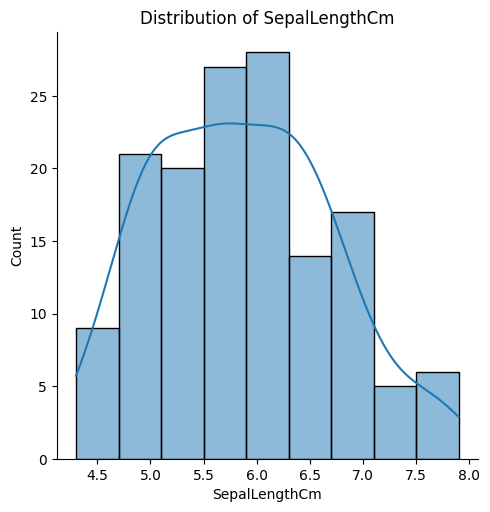

<Figure size 1000x600 with 0 Axes>

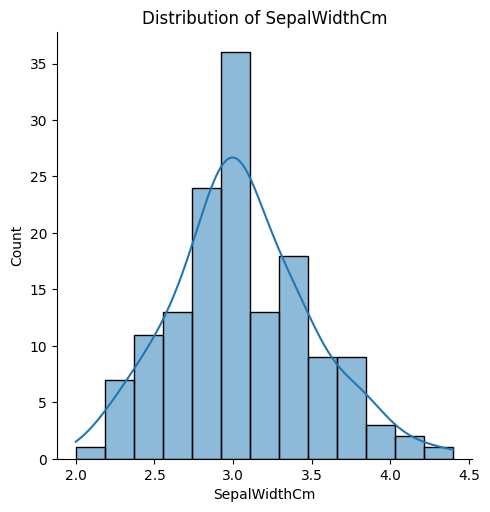

<Figure size 1000x600 with 0 Axes>

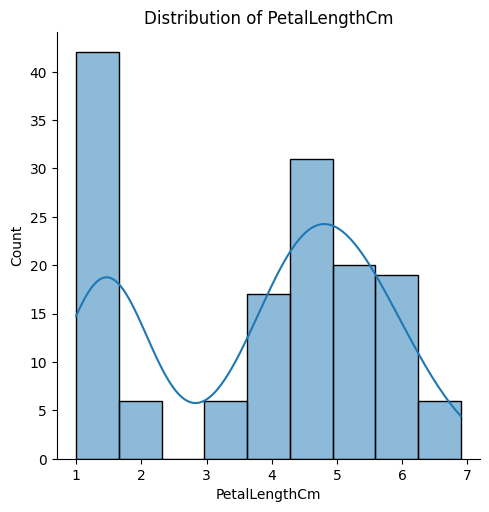

<Figure size 1000x600 with 0 Axes>

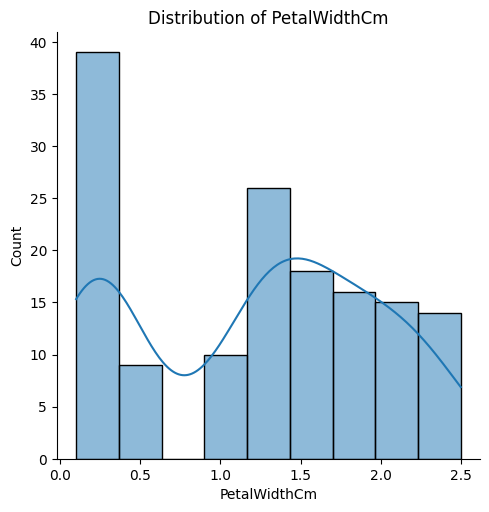

In [17]:
# Distribution of values of columns having numerical data
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data= data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

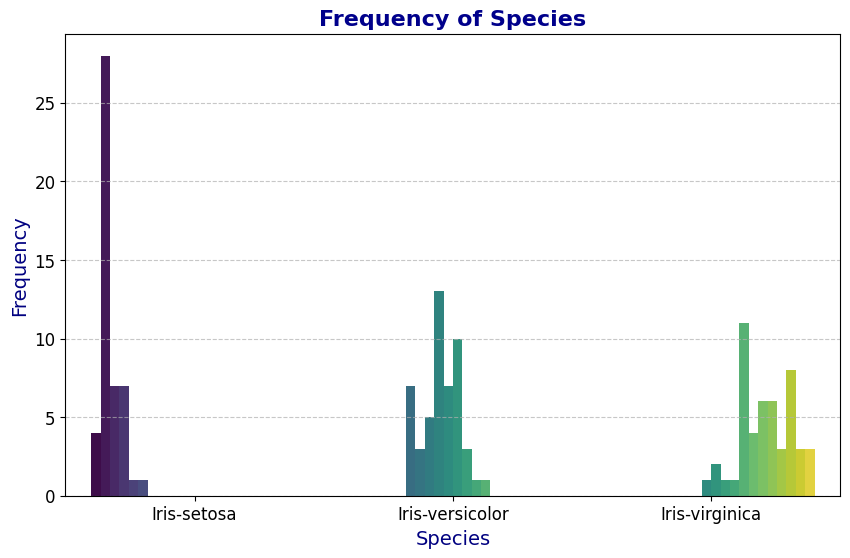

In [18]:
# Distribution of values of columns having categorical data

plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=data, hue=feature, legend=False,  palette='viridis')
plt.title(f'Frequency of Species', fontsize=16, color='darkblue', fontweight='bold')
plt.xlabel(f'Species', fontsize=14, color='navy')
plt.ylabel('Frequency', fontsize=14, color='navy')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Handling Outliers

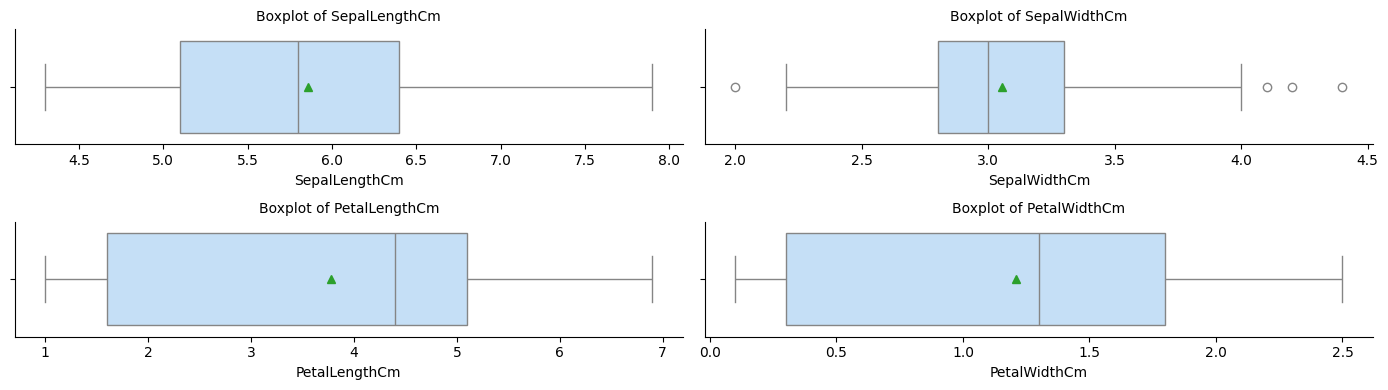

In [19]:
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(14, 4)) 
light_blue = '#BDE0FE'

for i, feature in enumerate(numerical_features, start=1):
    ax = plt.subplot(2, 2, i) 

    sns.boxplot(
        data=data,
        x=feature,  
        showmeans=True,  # Display mean as a marker within the box
        ax=ax,  
        color = light_blue
    )

    plt.title(f'Boxplot of {feature}', fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Tight layout to prevent overlapping elements
plt.tight_layout()

plt.show()

## Train Test Splitting

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 117
Rows in test set: 30



In [21]:
train_set['Species'].value_counts()

Species
Iris-virginica     40
Iris-versicolor    40
Iris-setosa        37
Name: count, dtype: int64

In [22]:
train_set.shape

(117, 5)

In [23]:
test_set['Species'].value_counts()

Species
Iris-setosa        11
Iris-versicolor    10
Iris-virginica      9
Name: count, dtype: int64

In [24]:
test_set.shape

(30, 5)

In [25]:
df_train = train_set.copy()
df_test = test_set.copy()

## Looking for Correlations

In [26]:
df_train.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14384\2600728369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)


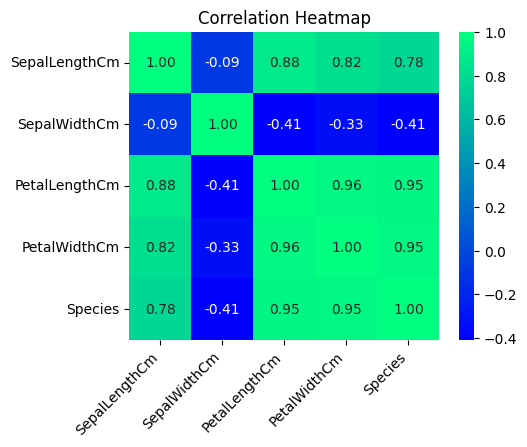

In [27]:
corr_matrix = df_train.corr()

# Create a heatmap to visualize correlation
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='winter', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.show()

In [28]:
# correlation with respect to target_column
corr_matrix['Species'].sort_values(ascending = False)

Species          1.000000
PetalWidthCm     0.954627
PetalLengthCm    0.948514
SepalLengthCm    0.779682
SepalWidthCm    -0.408133
Name: Species, dtype: float64

In [29]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

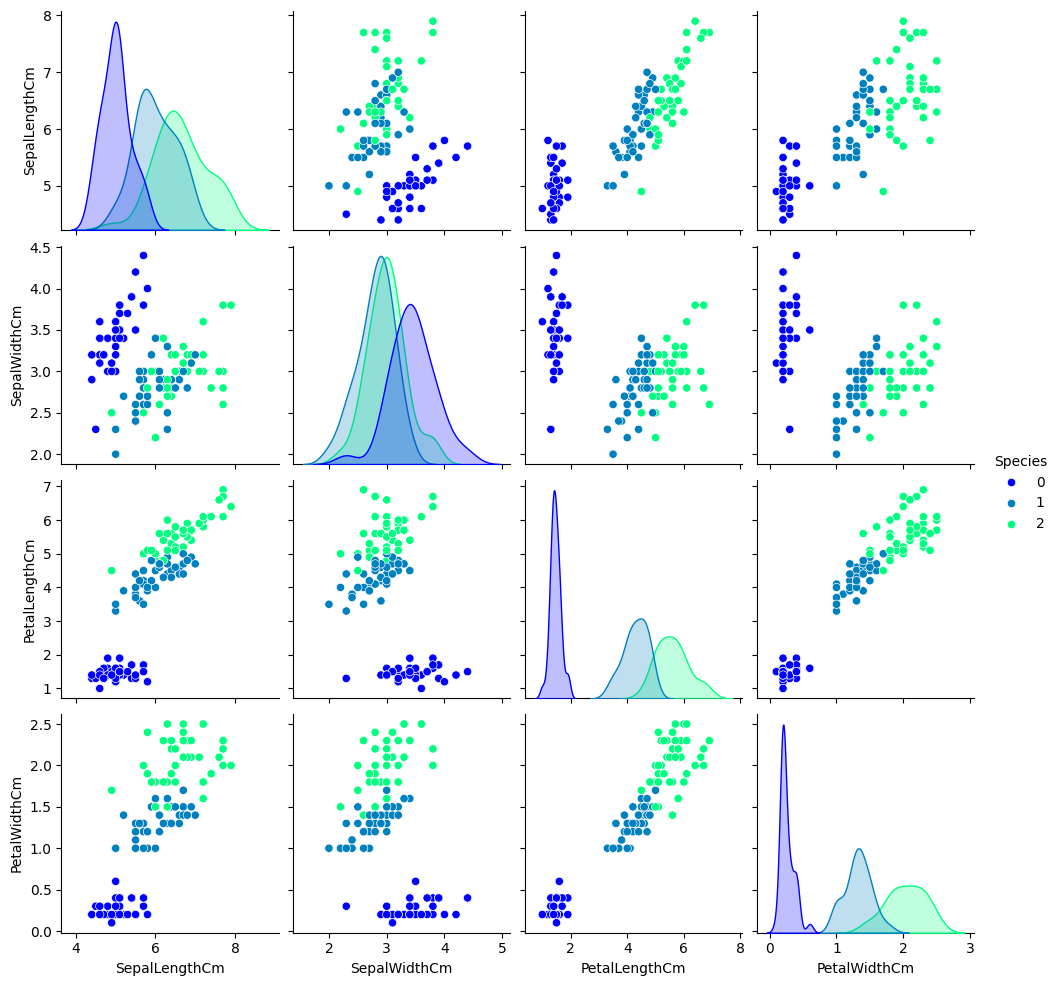

In [30]:
# Making Pair plot
sns.pairplot(df_train,hue= 'Species' , palette = 'winter', diag_kind = 'kde')
plt.show()

In [31]:
# Separate features (X_train) and target variable (Y_train) from the training set
X_train = df_train.drop(['Species'], axis=1)  # Features
Y_train = df_train['Species'].copy()  # Target variable

In [32]:
# Separate features (X_test) and target variable (Y_test) from the testing set
X_test = df_test.drop(['Species'], axis=1)
Y_test = df_test['Species'].copy()

## Creating a Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std scaler', StandardScaler())
])

In [34]:
# Passing training dataset into our pipeline for scaling the input features
X_tr = my_pipeline.fit_transform(X_train)

In [35]:
X_tr.shape

(117, 4)

In [36]:
Y_train.shape

(117,)

In [37]:
# Passing testing dataset into our pipeline
X_ts = my_pipeline.fit_transform(X_test)

In [38]:
X_ts.shape

(30, 4)

In [39]:
Y_test.shape

(30,)

## Selecting a desired model and Evaluating it

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

Model performance for Training set
- Accuracy: 0.9744
- F1 score: 0.9750
- Precision: 0.9752
- Recall: 0.9750
----------------------------------


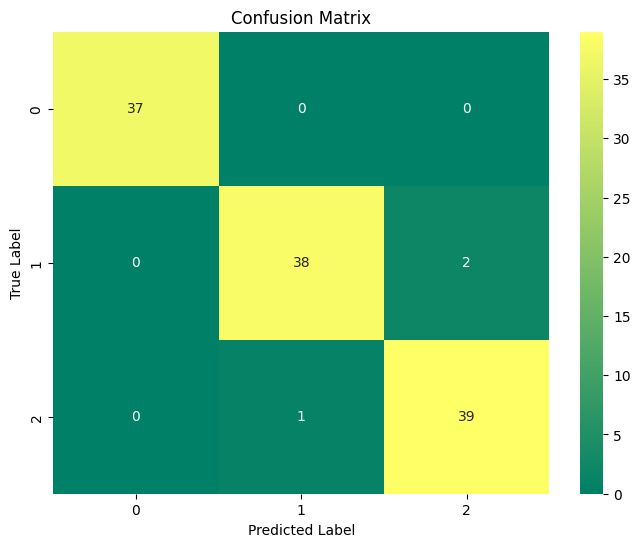

In [41]:
model = LogisticRegression()

# Traininng our model
model.fit(X_tr, Y_train)

# Making predictions
Y_train_pred = model.predict(X_tr)

# Training set performance
model_train_accuracy = accuracy_score(Y_train, Y_train_pred) 
model_train_f1 = f1_score(Y_train, Y_train_pred, average='macro') 
model_train_f1_list = model_train_f1.tolist()
model_train_precision = precision_score(Y_train, Y_train_pred, average='macro') 
model_train_recall = recall_score(Y_train, Y_train_pred, average='macro')


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1_list))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))

print('----------------------------------')

# Creating the confusion matrix
cm = confusion_matrix(Y_train, Y_train_pred)

# Creating a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='summer')  # Annotate with counts, format as integers

# Set labels (optional)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.title("Confusion Matrix")
plt.show()

## Testing the model on test data

Model performance for Testing set
- Accuracy: 0.9667
- F1 score: 0.9645
- Precision: 0.9697
- Recall: 0.9630
----------------------------------


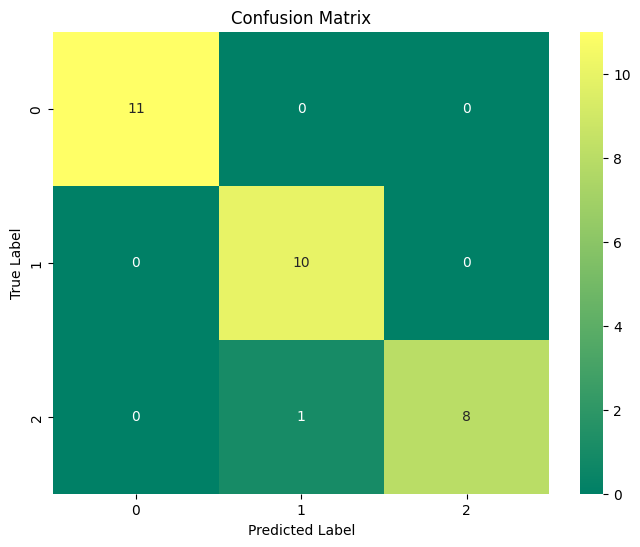

In [42]:
model = LogisticRegression()

model.fit(X_ts, Y_test)

# Making predictions
Y_test_pred = model.predict(X_ts)

# Testing set performance
model_test_accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(Y_test, Y_test_pred, average='macro') # Calculate F1-score
model_test_f1_list = model_test_f1.tolist()
model_test_precision = precision_score(Y_test, Y_test_pred, average='macro') # Calculate Precision
model_test_recall = recall_score(Y_test, Y_test_pred, average='macro') # Calculate Recall


print('Model performance for Testing set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1_list))

print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))

print('----------------------------------')

# Creating the confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Creating a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='summer')  # Annotate with counts, format as integers

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.title("Confusion Matrix")
plt.show()